In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

Consider three ensembles with 9, 25, 101 binary classifiers, respectively. 

Each ensemble has the same base classifier with an error rate of  𝜀base. The ensemble classifier predicts the class 
label of a test example by taking a majority vote on the prediction made by the base classifiers. 

Assume  that  the  base  classifiers  are  independent,  and  the  ensemble  makes  a  wrong  prediction 
only  if  more  than  half  of  the  base  classifiers  predict  incorrectly.  

Write  a  Python  program  to compute 𝜀ensemble  and  plot  the  relationship  of 𝜀base  vs. 𝜀ensemble.  

$$
E = \sum_{i=k}^{n} \binom{n}{i} \epsilon^i (1 - \epsilon)^{n-i}
$$


其中：
- $E$ 是集成模型的總錯誤率。
- $\epsilon$ 是單個分類器的錯誤率
- $n$ 是基分類器的總數（例如本題的 9/25/101）。
- $k$ 是超過半數基分類器需要正確分類的最小數量，通常為 $\lceil \frac{n}{2} \rceil$。
- $\binom{n}{i}$ 是組合數，表示從 $n$ 個基分類器中選擇 $i$ 個的方式數。



In [8]:
# def calculate_ensemble_error(n, epsilon_base):
#     ensemble_error = []
#     for epsilon in epsilon_base:
#         error = sum(binom.pmf(k, n, epsilon) for k in range(n//2 + 1, n + 1))
#         ensemble_error.append(error)
#     return ensemble_error

# calculate ensemble error rate by using binomial distribution
def calculate_ensemble_error(n, epsilon_base):
    majority = n // 2 + 1
    ensemble_error = list(map(lambda epsilon: sum(binom.pmf(k, n, epsilon) for k in range(majority, n + 1)), epsilon_base))
    return ensemble_error

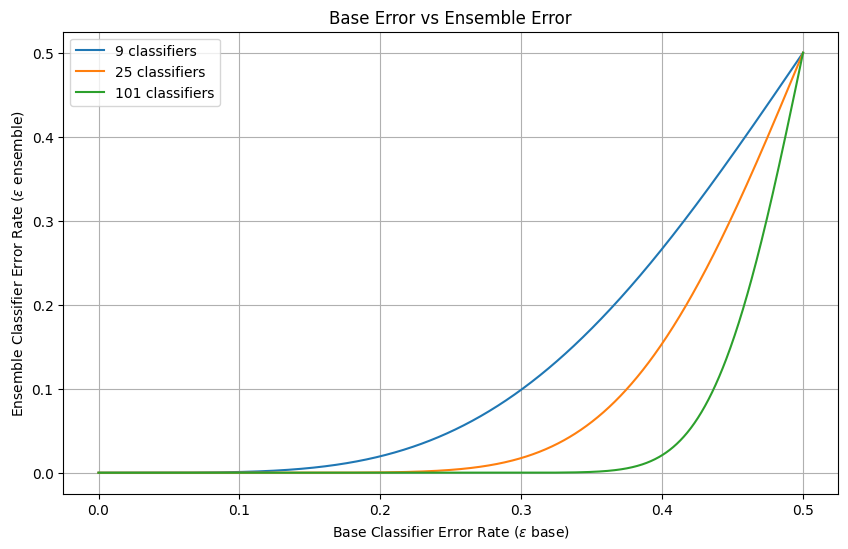

In [9]:
n_classifiers = [9, 25, 101]
epsilon_base = np.linspace(0, 0.5, 1000)

# 畫圖
plt.figure(figsize=(10, 6))
for n in n_classifiers:
    epsilon_ensemble = calculate_ensemble_error(n, epsilon_base)
    plt.plot(epsilon_base, epsilon_ensemble, label=f'{n} classifiers')

plt.title('Base Error vs Ensemble Error')
plt.xlabel(r'Base Classifier Error Rate ($\epsilon$ base)')
plt.ylabel(r'Ensemble Classifier Error Rate ($\epsilon$ ensemble)')
plt.legend()
plt.grid(True)
plt.show()
